---
# <center>Principal components analysis (PCA)</center>
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import some data

In [7]:

X = pd.read_csv('CA Housing Data.csv')

## Scatter plot

<Axes: xlabel='6', ylabel='7'>

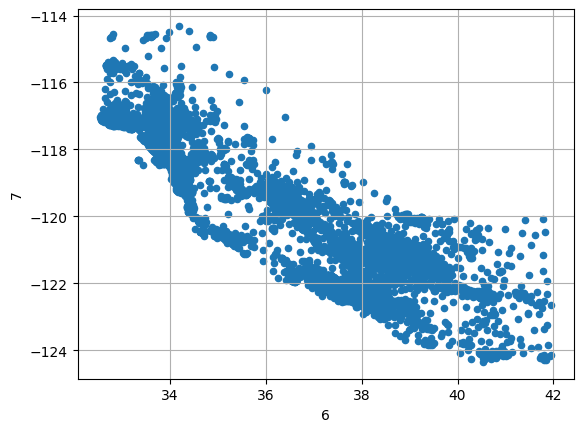

In [10]:
X.plot(kind='scatter',x=7,y=8, grid=True)

# Step 1: Normalize the data

<img src="Xnorm.png" alt="Drawing" style="width: 200px;"/>

In [11]:
X.describe()
# Use this to see the mean of each column. We want it to be = 0 and the StDev to be = 1

,Unnamed: 0,0,1,2,3,4,5,6,7
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,10319.500000,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,5958.399114,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.000000,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,5159.750000,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,10319.500000,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,15479.250000,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,20639.000000,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [12]:
mu = X.mean()
sigma = X.std()

In [17]:
# Note that this is the normalization formula here

Xnorm = (X - mu)/sigma

In [20]:
Xnorm.mean()

Unnamed: 0   -8.812933e-17
0             7.711317e-17
1             3.855658e-17
2             9.088337e-17
3            -9.363741e-17
4            -1.927829e-17
5             4.131062e-18
6            -9.914550e-16
7            -8.570577e-15
dtype: float64

In [18]:
Xnorm.std()

Unnamed: 0    1.0
0             1.0
1             1.0
2             1.0
3             1.0
4             1.0
5             1.0
6             1.0
7             1.0
dtype: float64

<Axes: xlabel='6', ylabel='7'>

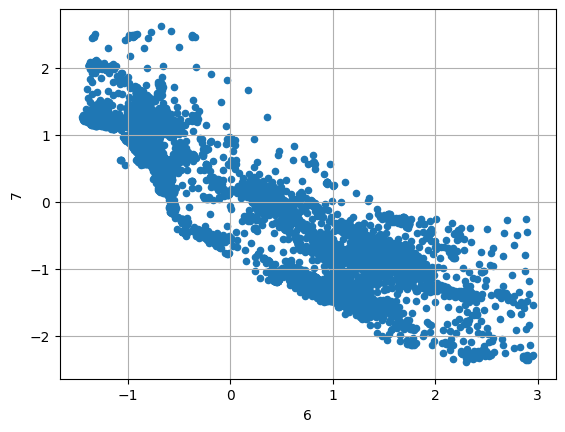

In [19]:
Xnorm.plot(kind='scatter', x=7, y=8, grid=True)

# Step 2: Perform SVD on the normalized data

<img src="svd.png" alt="Drawing" style="width: 200px;"/>

In [33]:
from scipy.linalg import svd

U, s, Vt = svd(Xnorm,full_matrices=False)
Sigma = np.diag(s)
V = Vt.T

## We can check the decomposition

In [34]:
np.allclose(Xnorm, U@Sigma@V.T)

True

In [36]:
U @ Sigma @ V.T

array([[-1.73192494,  2.34470896,  0.98211887, ..., -0.04959533,
         1.05252278, -1.32780305],
       [-1.73175711,  2.33218146, -0.60700421, ..., -0.09250999,
         1.04315928, -1.32281187],
       [-1.73158927,  1.78265622,  1.85613656, ..., -0.0258419 ,
         1.03847753, -1.33279424],
       ...,
       [ 1.73158927, -1.14256563, -0.92482882, ..., -0.07173277,
         1.77819439, -0.82369324],
       [ 1.73175711, -1.05455737, -0.84537267, ..., -0.09122294,
         1.77819439, -0.87360511],
       [ 1.73192494, -0.78011057, -1.00428498, ..., -0.0436811 ,
         1.75010387, -0.83367562]])

## We can recover the original dataset from the decomposition

<img src="unXnorm.png" alt="Drawing" style="width: 200px;"/>

In [38]:
mu + Sigma* pd.DataFrame(U @ Sigma@ V.T)
#Xrecoverd
#np.allclose(X, Xrecoverd)

ValueError: Unable to coerce to DataFrame, shape must be (20640, 9): given (9, 9)